# PCA @ Tensorflow 2

In [1]:
import tensorflow as tf
# from tensorflow import keras

assert tf.version.VERSION == '2.3.0'

Build 3D dataset:

In [2]:
import numpy.random as rnd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

rnd.seed(4)
m = 5000 # total samples
test_samples = 1
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:m-test_samples])
X_test = scaler.transform(data[m-test_samples:])

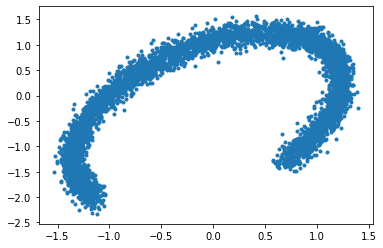

In [3]:
plt.figure()
plt.plot(X_train[:,0], X_train[:,1],'C0.')
# plt.plot(chkpoint_list[:,0], chkpoint_list[:,1],'C1o')



In [4]:
class my_dynamic_model(tf.keras.Model):
    def __init__(self,  units = 3, **kargs):
        super().__init__(**kargs)
        self.hidden_encode = tf.keras.layers.Dense(2, input_shape=[3])
        self.hidden_decode = tf.keras.layers.Dense(3)
        
    def call(self, inputs):
        encoded = self.hidden_encode(inputs)
        decoded = self.hidden_decode(encoded)
        #tmp = tf.keras.Model(inputs=inputs, outputs=encoded, name="encoder")
        print ('dm call')
        return decoded
    
    def get_encoder_model(self):
        return tf.keras.models.Sequential([self.hidden_encode])


In [5]:
model = my_dynamic_model(units = 3)

In [6]:
# model.compile(loss = "mse", optimizer = tf.keras.optimizers.SGD(lr=0.1))
model.compile(loss = "mse")

In [7]:
history = model.fit(X_train, X_train, epochs = 50, verbose = 0)

dm call
dm call


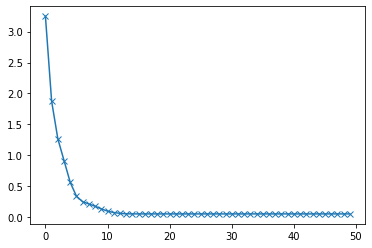

In [8]:
plt.figure()
plt.plot(history.history['loss'],'-x')

In [9]:
# model.projections([[1,2,3]])
model.hidden_encode.get_weights()

[array([[-0.94477564,  0.14150321],
        [ 0.00733558, -0.834081  ],
        [-0.40337196, -0.49888495]], dtype=float32),
 array([-0.00142446, -0.0011821 ], dtype=float32)]

In [10]:
model_encoder = model.get_encoder_model()

In [11]:
X_align = [1,1,1]
y_align = [-0.37301758,  1.1074662]

X_align_train = np.array([X_align,X_align])
y_align_train = np.array([y_align,y_align])

model_encoder.compile(loss = "mse")
# align_history = test_model.fit(X_align_train, y_align_train, epochs = 3, verbose = 0)

In [12]:
# plt.figure()
# plt.plot(align_history.history['loss'],'-x')

In [32]:
h1_list = []
h2_list = []

ITERATIONS = 200
for i in range(ITERATIONS):
    print ('%d/%d      \r'%(i,ITERATIONS), end = '')
    history = model.fit(X_train, X_train, epochs = 5, verbose = 0)
    align_history = model_encoder.fit(X_align_train, y_align_train, epochs = 15, verbose = 0)
    h1_list.append(history.history['loss'])
    h2_list.append(align_history.history['loss'])

<IPython.core.display.Javascript object>


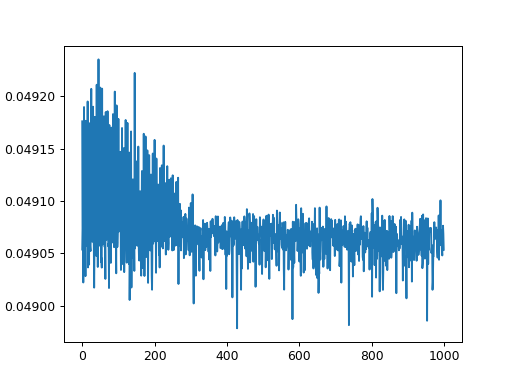

<IPython.core.display.Javascript object>


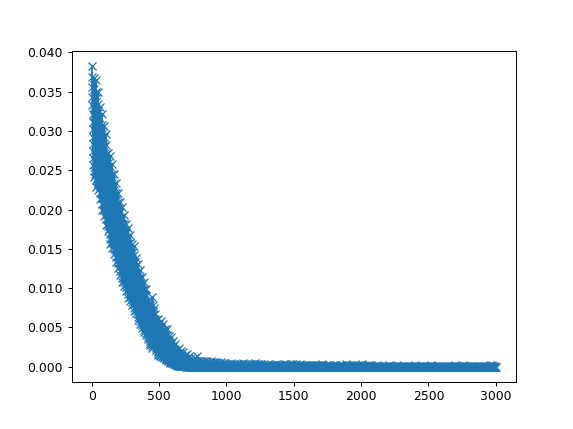

In [33]:
plt.figure()
plt.plot(np.hstack(h1_list))

plt.figure()
plt.plot(np.hstack(h2_list),'-x')
         

In [34]:
coding = model_encoder.predict(X_train)
align_coding_vect = model_encoder.predict(X_align_train)
align_coding = align_coding_vect[0]


<IPython.core.display.Javascript object>


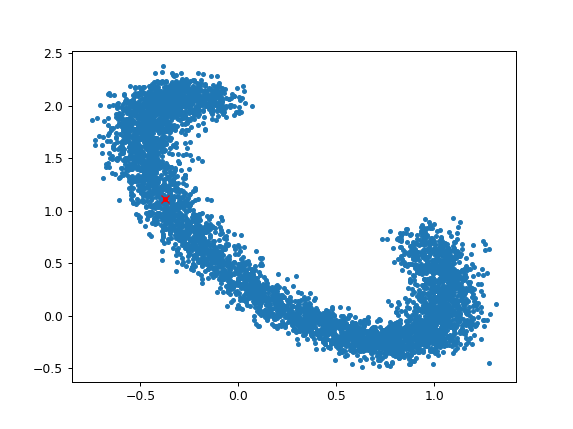

In [35]:
%matplotlib notebook
plt.figure()
plt.plot(coding[:,0], coding[:,1],'.')
plt.plot(y_align[0], y_align[1], 'rx')
plt.plot(align_coding[0], align_coding[1], 'r.')


In [17]:
np.array(y_align).reshape(1,-1)

array([[-0.37301758,  1.1074662 ]])

In [ ]:
align_coding